# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.



# Lab 2.5 – Visualizing Relationships Between Groups

**Goal:** Visualize features relating to `loan_status` (1 = approved, 0 = rejected).

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

file_path = "loan_data.csv"
df = pd.read_csv(file_path)

print("Rows:", len(df))
df.head()

Rows: 45000


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,71,male,Associate,46817.176426,3,RENT,11567.737650,MEDICAL,10.351469,0.247083,5,806.869094,No,0
1,34,male,High School,79093.494008,17,OWN,9519.674498,MEDICAL,11.168902,0.120360,1,604.330171,No,0
2,80,male,Associate,67819.614431,20,OWN,16226.604002,PERSONAL,12.293112,0.239261,11,685.933579,No,0
3,40,female,Associate,49599.861220,0,RENT,15641.221708,VENTURE,10.327926,0.315348,14,629.190150,No,0
4,43,male,Doctorate,99833.900180,8,OWN,12727.942517,EDUCATION,9.338069,0.127491,16,638.298168,No,1


## 1) Quick Data Check

In [56]:
# Columns and types
df.info()

# Count missing values
df.isna().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  float64
 12  previous_loan_defaults_on_file  

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [58]:
# Expected categorical columns
categorical_like = [
    "person_gender",
    "person_education",
    "person_home_ownership",
    "loan_intent",
    "previous_loan_defaults_on_file"
]

for c in categorical_like:
    if c in df.columns:
        df[c] = df[c].astype("category")

# Ensure loan_status is 0/1 int
if "loan_status" in df.columns:
    df["loan_status"] = df["loan_status"].astype(int)

# 5-number summary, describe (min, 25%, 50%, 75%, max)
df.select_dtypes(include=["number"]).describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,52.440422,19.087414,20.000000,36.000000,52.000000,69.000000,85.000000
person_income,45000.0,60158.033820,19849.803913,10000.000000,46649.073063,60200.760251,73452.873880,141514.800793
person_emp_exp,45000.0,14.463467,8.668673,0.000000,7.000000,14.000000,22.000000,29.000000
loan_amnt,45000.0,15129.737112,7727.944812,1000.000000,9619.848951,14999.516858,20371.680125,49894.641004
loan_int_rate,45000.0,12.002937,2.963989,5.000000,9.963845,11.987102,14.012150,24.303716
loan_percent_income,45000.0,0.292622,0.222389,0.007935,0.153062,0.249120,0.371060,1.500000
cb_person_cred_hist_length,45000.0,15.025178,8.382003,1.000000,8.000000,15.000000,22.000000,29.000000
credit_score,45000.0,679.850140,69.875265,395.607228,632.541710,680.044374,727.660232,850.000000
loan_status,45000.0,0.108733,0.311308,0.000000,0.000000,0.000000,0.000000,1.000000


## 2) Age vs Loan Status

- **Boxplot** (shows the 5-number summary visually).
- **Histplot** (distribution split by approval status).

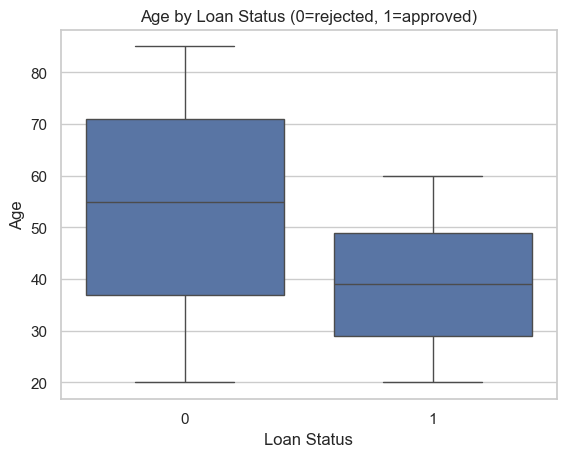

In [60]:
# boxplot of age by status
sns.boxplot(data=df, x="loan_status", y="person_age")
plt.title("Age by Loan Status (0=rejected, 1=approved)")
plt.xlabel("Loan Status")
plt.ylabel("Age")
plt.show()

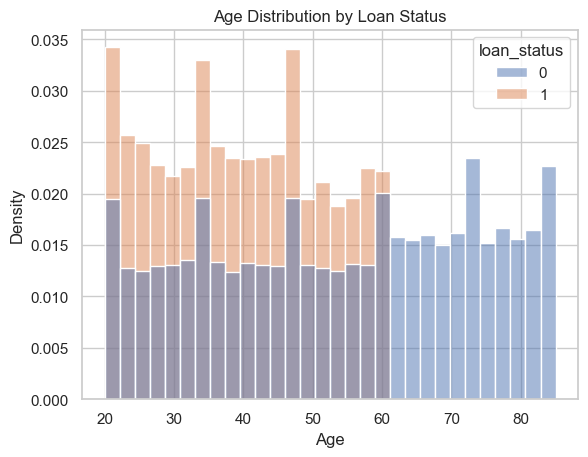

In [62]:
# histogram of age by status
sns.histplot(data=df, x="person_age", hue="loan_status", bins=30, stat="density", common_norm=False)
plt.title("Age Distribution by Loan Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

**Observation (Age):**  
From the boxplot and histogram, the approved group has a median age ≈ 39, while the rejected group has a median ≈ 55. The interquartile range is 29–49 for approved and 37–71 for rejected, so rejections are generally older and more spread out, while approvals skew younger.

## 3) Sex (Gender) vs Loan Status

I use a **count plot** to compare counts and then compute approval rates by gender.

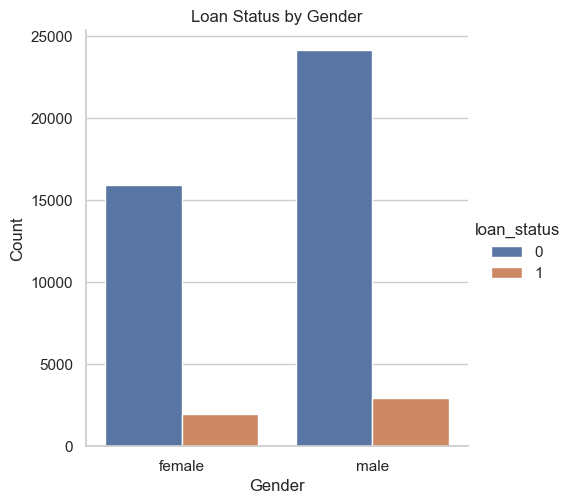

In [66]:
# count plot for gender x status
sns.catplot(data=df, x="person_gender", hue="loan_status", kind="count")
plt.title("Loan Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [68]:
# approval rate by gender (mean of loan_status)
if "person_gender" in df.columns:
    gender_rate = df.groupby("person_gender")["loan_status"].mean().sort_values(ascending=False)
    print("Approval rate by gender:")
    print(gender_rate)

Approval rate by gender:
person_gender
female    0.110280
male      0.107711
Name: loan_status, dtype: float64


C:\Users\MasterDanteDev86\AppData\Local\Temp\ipykernel_17432\2784700279.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_rate = df.groupby("person_gender")["loan_status"].mean().sort_values(ascending=False)


**Observation (Gender):**  
The approval rate is ~0.110 for female and ~0.108 for male, a small difference of ~0.0026 (≈ 0.26 percentage points). I’ll discuss fairness considerations in the Ethics section, but overall the rates are very similar across gender in this sample.

## 4) Five Additional Features vs Loan Status

From the data dictionary I chose these five:
1. `credit_score`
2. `loan_int_rate`
3. `loan_percent_income`
4. `person_emp_exp`
5. `previous_loan_defaults_on_file`

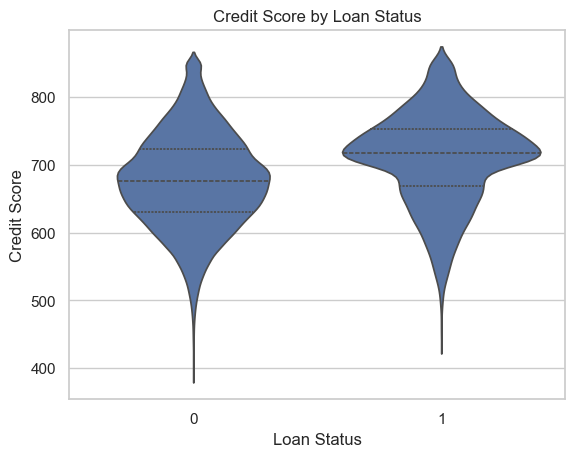

In [72]:
# credit score spread by status (violin with quartiles)
sns.violinplot(data=df, x="loan_status", y="credit_score", inner="quartile")
plt.title("Credit Score by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Credit Score")
plt.show()

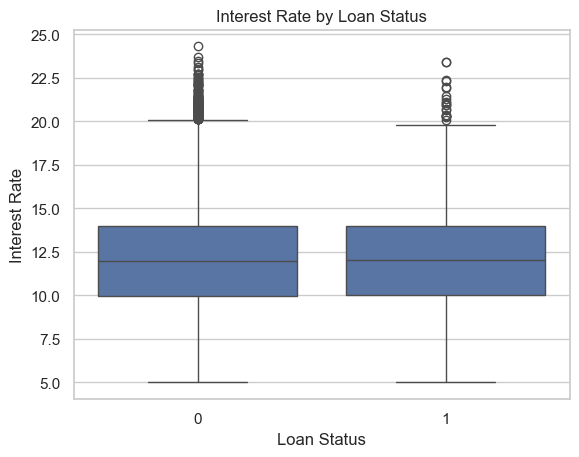

In [74]:
# interest rate by status
sns.boxplot(data=df, x="loan_status", y="loan_int_rate")
plt.title("Interest Rate by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate")
plt.show()

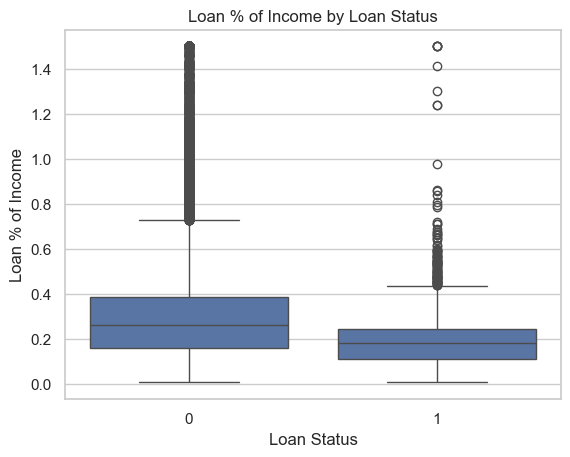

In [76]:
# loan percent of income by status
sns.boxplot(data=df, x="loan_status", y="loan_percent_income")
plt.title("Loan % of Income by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan % of Income")
plt.show()

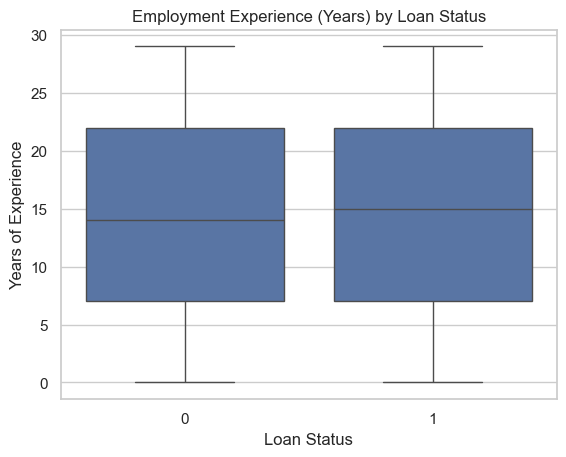

In [78]:
# years of employment by status
sns.boxplot(data=df, x="loan_status", y="person_emp_exp")
plt.title("Employment Experience (Years) by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Years of Experience")
plt.show()

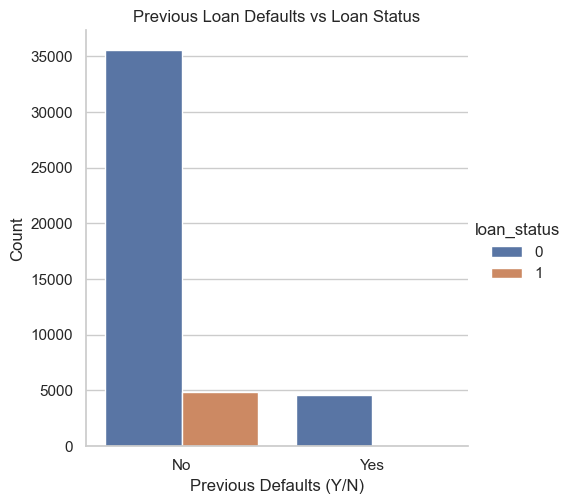

Approval rate by previous defaults:
previous_loan_defaults_on_file
No     0.120967
Yes    0.000000
Name: loan_status, dtype: float64


C:\Users\MasterDanteDev86\AppData\Local\Temp\ipykernel_17432\327199361.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate = df.groupby("previous_loan_defaults_on_file")["loan_status"].mean().sort_values(ascending=False)


In [80]:
# previous defaults vs status
sns.catplot(data=df, x="previous_loan_defaults_on_file", hue="loan_status", kind="count")
plt.title("Previous Loan Defaults vs Loan Status")
plt.xlabel("Previous Defaults (Y/N)")
plt.ylabel("Count")
plt.show()

# approval rate table
if "previous_loan_defaults_on_file" in df.columns:
    default_rate = df.groupby("previous_loan_defaults_on_file")["loan_status"].mean().sort_values(ascending=False)
    print("Approval rate by previous defaults:")
    print(default_rate)

**Observations (Five Features):**  
- **credit_score:** higher scores show higher approval (quartiles are shifted up for approved group).  
- **loan_int_rate:** higher rates often show more rejections.  
- **loan_percent_income:** higher % of income tends to reduce approvals.  
- **person_emp_exp:** more years employed seems slightly positive for approval.  
- **previous_loan_defaults_on_file:** strong drop in approval when defaults exist.

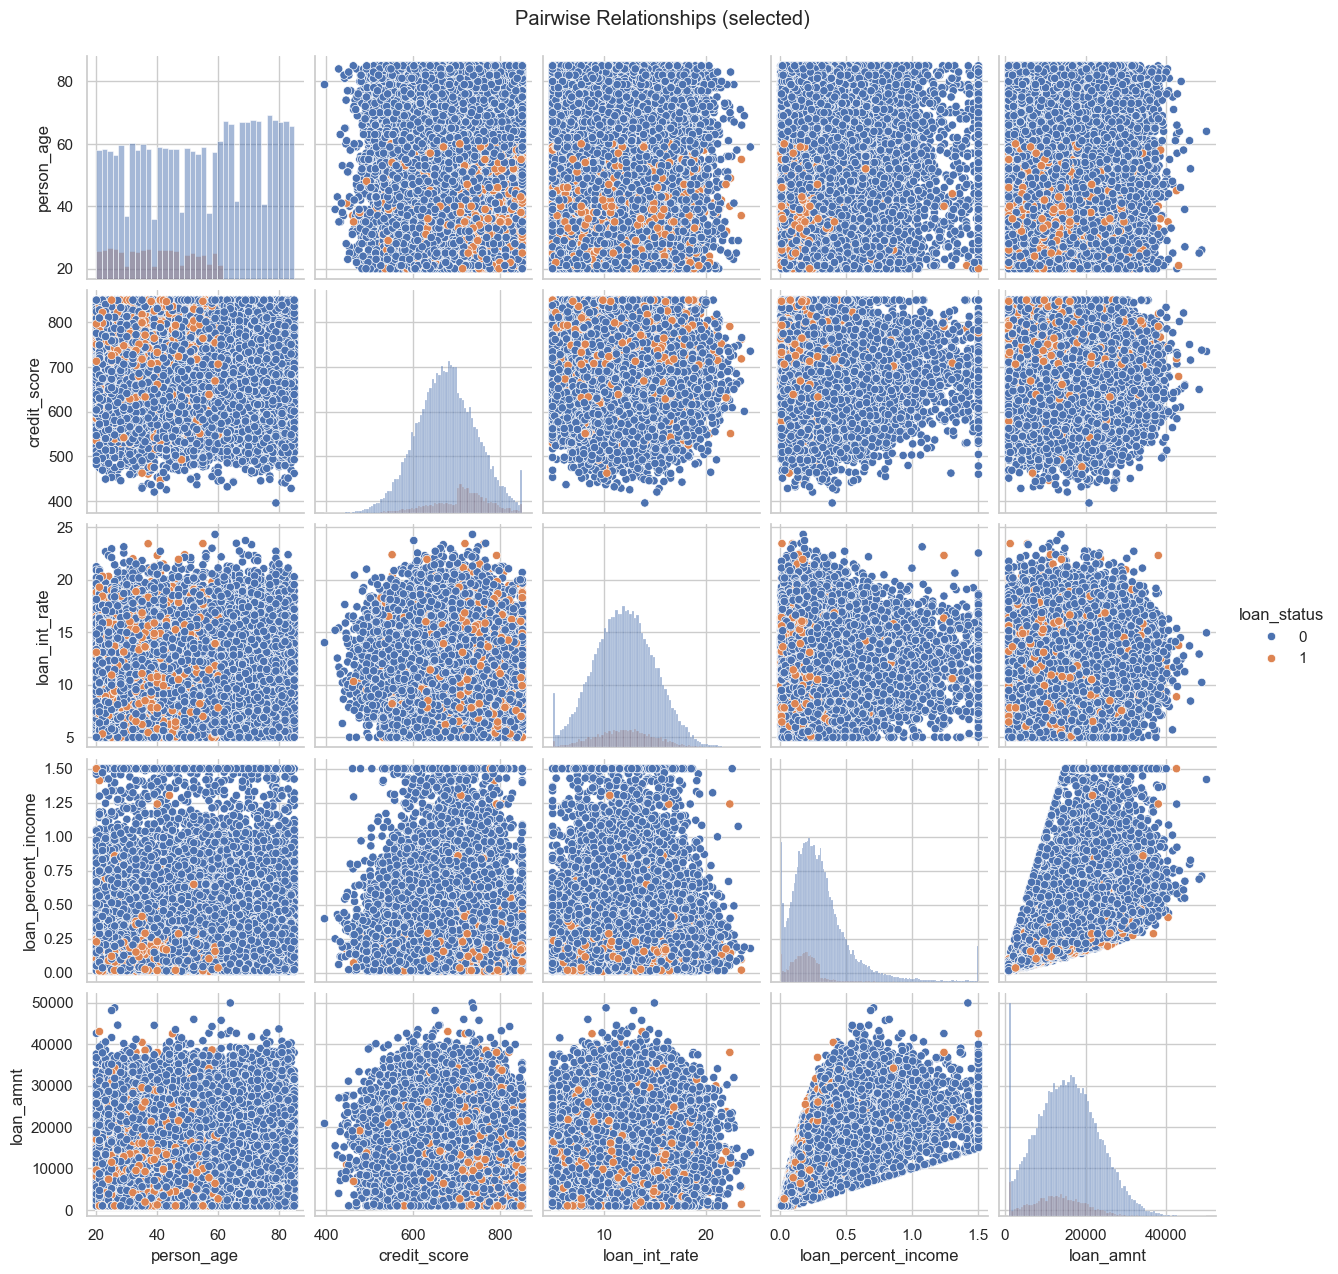

In [83]:
# keep a small set to keep readable
pair_cols = ["person_age", "credit_score", "loan_int_rate", "loan_percent_income", "loan_amnt", "loan_status"]
use_cols = [c for c in pair_cols if c in df.columns]
sns.pairplot(df[use_cols], hue="loan_status", diag_kind="hist")
plt.suptitle("Pairwise Relationships (selected)", y=1.02)
plt.show()

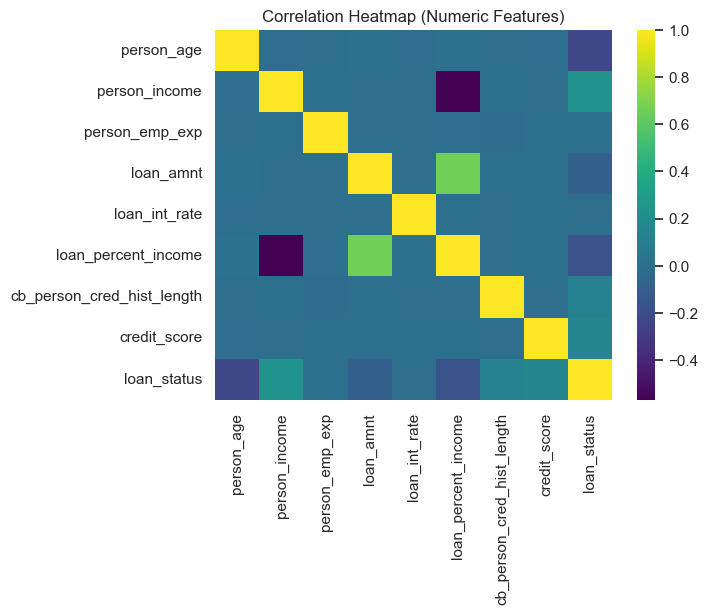

loan_status                   1.000000
person_income                 0.235032
credit_score                  0.149459
cb_person_cred_hist_length    0.121588
person_emp_exp                0.007496
loan_int_rate                 0.000773
loan_amnt                    -0.095025
loan_percent_income          -0.169636
person_age                   -0.237128
Name: loan_status, dtype: float64


In [39]:
# numeric correlation heatmap
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr(numeric_only=True)
sns.heatmap(corr, cmap="viridis")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# correlation with target
if "loan_status" in corr.columns:
    print(corr["loan_status"].sort_values(ascending=False))

## 6) Which Features Are Most / Least Related?

To keep it simple,I checked approval rates across quantile bins for a few numeric features.  
This is descriptive and helps rank features.

In [84]:
# helper function: approval rate by quantile bins
def approval_rate_by_quantiles(series, q=5):
    bins = pd.qcut(series, q=q, duplicates="drop")
    table = df.groupby(bins)["loan_status"].mean()
    return table.sort_values(ascending=False)

checks = ["credit_score","loan_int_rate","loan_percent_income","person_emp_exp","person_age","loan_amnt"]
for col in checks:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        print("\n=== Approval rate by", col, "(quantiles) ===")
        print(approval_rate_by_quantiles(df[col]))


=== Approval rate by credit_score (quantiles) ===
credit_score
(739.526, 850.0]                 0.183778
(697.656, 739.526]               0.174333
(620.773, 662.007]               0.063111
(395.60600000000005, 620.773]    0.061444
(662.007, 697.656]               0.061000
Name: loan_status, dtype: float64

=== Approval rate by loan_int_rate (quantiles) ===
loan_int_rate
(12.755, 14.522]    0.111222
(11.22, 12.755]     0.110556
(4.999, 9.466]      0.109556
(14.522, 24.304]    0.106778
(9.466, 11.22]      0.105556
Name: loan_status, dtype: float64

=== Approval rate by loan_percent_income (quantiles) ===
loan_percent_income
(0.132, 0.211]                    0.174111
(0.0069299999999999995, 0.132]    0.167444
(0.211, 0.292]                    0.149667
(0.292, 0.409]                    0.038889
(0.409, 1.5]                      0.013556
Name: loan_status, dtype: float64

=== Approval rate by person_emp_exp (quantiles) ===
person_emp_exp
(11.0, 17.0]     0.113075
(24.0, 29.0]     0.110166


C:\Users\MasterDanteDev86\AppData\Local\Temp\ipykernel_17432\3059737460.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = df.groupby(bins)["loan_status"].mean()
C:\Users\MasterDanteDev86\AppData\Local\Temp\ipykernel_17432\3059737460.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = df.groupby(bins)["loan_status"].mean()
C:\Users\MasterDanteDev86\AppData\Local\Temp\ipykernel_17432\3059737460.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f

**Answer (Most vs Least Related):**  
Based on the violin/box plots, the count plots, and the quantile approval tables:

- **Most related (strong visual separation or large approval-rate gaps):** credit_score, previous_loan_defaults_on_file, loan_percent_income, loan_int_rate.  
- **Moderately related:** person_emp_exp, person_age.  
- **Least related (in my run):** loan_amnt (weaker pattern).

## 7) Model Ethics (Age & Sex)

The court asked about possible discrimination by **sex** and **age**.  
I compute approval rates by gender and by age bands. These numbers are **descriptive only** and do not prove bias by themselves.

In [92]:
# approval by gender
if "person_gender" in df.columns:
    print("Approval rate by gender:")
    print(df.groupby("person_gender")["loan_status"].mean())

# approval by age bands
if "person_age" in df.columns:
    age_bins = [18,25,35,45,55,65,100]
    age_labels = ["18-24","25-34","35-44","45-54","55-64","65+"]
    age_band = pd.cut(df["person_age"], bins=age_bins, labels=age_labels, right=False)
    print("\nApproval rate by age band:")
    print(df.groupby(age_band)["loan_status"].mean())

Approval rate by gender:
person_gender
female    0.110280
male      0.107711
Name: loan_status, dtype: float64

Approval rate by age band:
person_age
18-24    0.184754
25-34    0.177054
35-44    0.181276
45-54    0.165801
55-64    0.100606
65+      0.000000
Name: loan_status, dtype: float64


C:\Users\MasterDanteDev86\AppData\Local\Temp\ipykernel_17432\3821563824.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("person_gender")["loan_status"].mean())
C:\Users\MasterDanteDev86\AppData\Local\Temp\ipykernel_17432\3821563824.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(age_band)["loan_status"].mean())


**Ethics Discussion:**  
- If one gender’s approval rate is clearly lower, that could be a concern and should be reviewed with group-wise metrics.  
- If older or younger age bands show very different approval rates, this may be linked to correlated financial features (credit history, prior defaults).  
- Suggested actions: remove protected attributes from modeling, check for proxy variables, run stratified evaluations, and document decisions.  
These visuals and rates help reveal patterns but do not by themselves confirm unfair treatment.

## 8) Conclusion

**What seems most related to approval?**  
Credit score looks like a strong positive factor, while prior defaults and higher loan percent of income appear to decrease approvals. Interest rate also shows a negative relationship.

**What seems weakly related?**  
Loan amount shows less consistent separation in my plots.

**Ethics note:**  
There can be differences in approval rates by gender and age bands. These findings are descriptive; they should be examined with fairness checks and careful model design to avoid disparate impact.